Ladda in och filtrera data

In [14]:
import pandas as pd

# Ladda in data
athletes = pd.read_csv("athlete_events.csv")
noc = pd.read_csv("noc_regions.csv")

# Slå ihop dataset för att få regionnamn
data = pd.merge(athletes, noc, on="NOC", how="left")

# Filtrera på Ungern
hungary = data[data["region"] == "Hungary"]


Grundläggande info (EDA)

In [15]:
hungary.info()
hungary.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 6607 entries, 208 to 271020
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      6607 non-null   int64  
 1   Name    6607 non-null   object 
 2   Sex     6607 non-null   object 
 3   Age     6461 non-null   float64
 4   Height  4726 non-null   float64
 5   Weight  4740 non-null   float64
 6   Team    6607 non-null   object 
 7   NOC     6607 non-null   object 
 8   Games   6607 non-null   object 
 9   Year    6607 non-null   int64  
 10  Season  6607 non-null   object 
 11  City    6607 non-null   object 
 12  Sport   6607 non-null   object 
 13  Event   6607 non-null   object 
 14  Medal   1135 non-null   object 
 15  region  6607 non-null   object 
 16  notes   0 non-null      object 
dtypes: float64(3), int64(2), object(12)
memory usage: 929.1+ KB


,ID,Age,Height,Weight,Year
count,6607.00000,6461.000000,4726.000000,4740.000000,6607.000000
mean,69123.15983,25.359078,175.881507,71.660232,1969.164825
std,37733.06245,6.120854,10.531300,15.358222,29.869196
min,99.00000,12.000000,144.000000,35.000000,1896.000000
25%,38966.00000,21.000000,169.000000,61.000000,1952.000000
50%,63600.00000,25.000000,176.000000,70.000000,1972.000000
75%,103524.00000,28.000000,184.000000,80.000000,1992.000000
max,135526.00000,58.000000,209.000000,160.000000,2016.000000


NameError: name 'Medal' is not defined

In [16]:
hungary['Weight'].value_counts().head(6607)


Weight
60.0     187
78.0     167
63.0     157
80.0     151
65.0     148
        ... 
98.5       2
134.0      2
160.0      2
43.0       1
113.0      1
Name: count, Length: 95, dtype: int64

In [17]:
hungary[hungary['Weight'] == 0].shape[0]


0

3. Vikt (weight)

Kolla statistik över vikt hos ungerska deltagare:

In [29]:
hungary['Medal'].describe()

count     1135
unique       3
top       Gold
freq       432
Name: Medal, dtype: object

In [35]:
# Konvertera textkolumn till riktig texttyp (rekommenderas)
hungary["Medal"] = hungary["Medal"].astype("string")

C:\Users\fanny\AppData\Local\Temp\ipykernel_6540\2447545473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hungary["Medal"] = hungary["Medal"].astype("string")


In [18]:
hungary['Weight'].describe()


count    4740.000000
mean       71.660232
std        15.358222
min        35.000000
25%        61.000000
50%        70.000000
75%        80.000000
max       160.000000
Name: Weight, dtype: float64

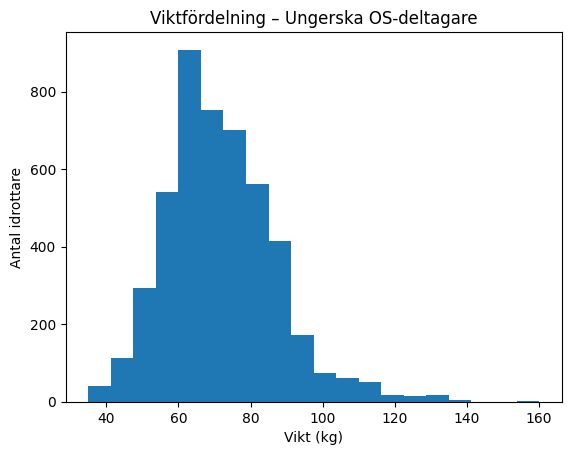

In [19]:
import matplotlib.pyplot as plt

plt.hist(hungary['Weight'].dropna(), bins=20)
plt.title("Viktfördelning – Ungerska OS-deltagare")
plt.xlabel("Vikt (kg)")
plt.ylabel("Antal idrottare")
plt.show()


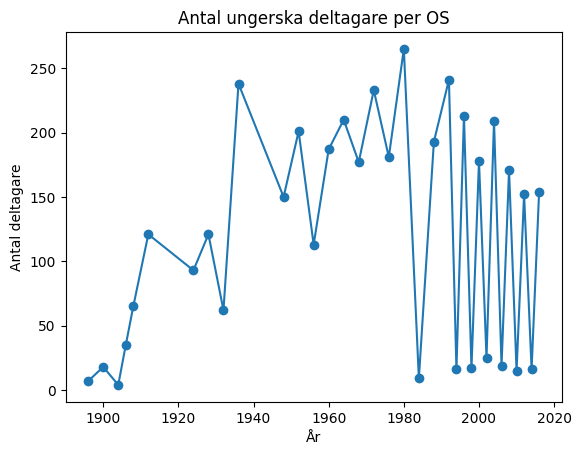

In [20]:
yearly_counts = hungary.groupby('Year')['ID'].nunique()
yearly_counts.plot(kind='line', marker='o')
plt.title("Antal ungerska deltagare per OS")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.show()


In [38]:
hungary[hungary['Medal'] == 0].shape[0]
hungary['Medal'].value_counts() 

Medal
Gold      432
Bronze    371
Silver    332
Name: count, dtype: Int64

In [28]:
weight_trend = hungary.groupby("Year")["Medal"].mean()


TypeError: agg function failed [how->mean,dtype->object]

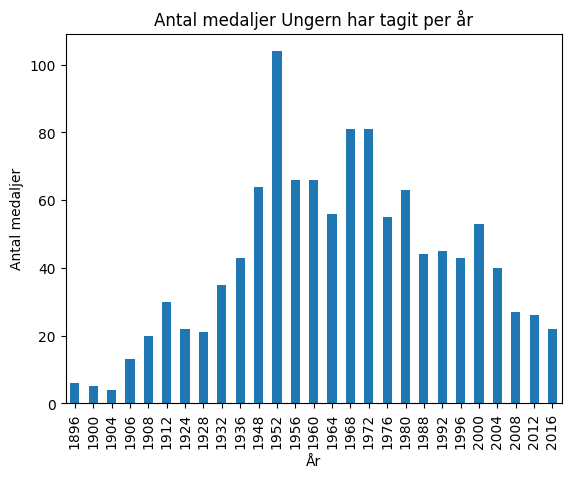

In [21]:
medals = hungary[hungary['Medal'].notna()]
medal_per_year = medals.groupby('Year')['Medal'].count()

medal_per_year.plot(kind='bar')
plt.title("Antal medaljer Ungern har tagit per år")
plt.xlabel("År")
plt.ylabel("Antal medaljer")
plt.show()


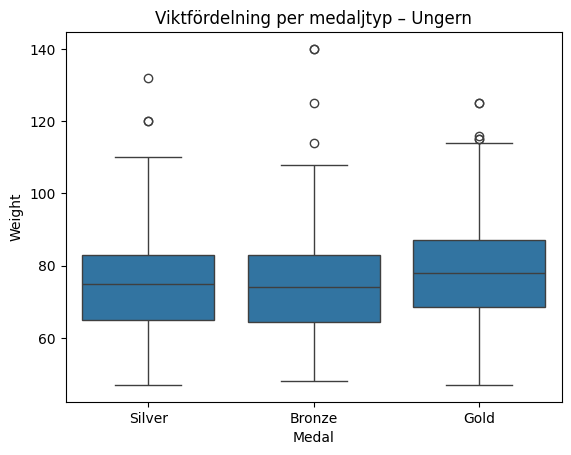

In [22]:
import seaborn as sns

sns.boxplot(x='Medal', y='Weight', data=medals)
plt.title("Viktfördelning per medaljtyp – Ungern")
plt.show()


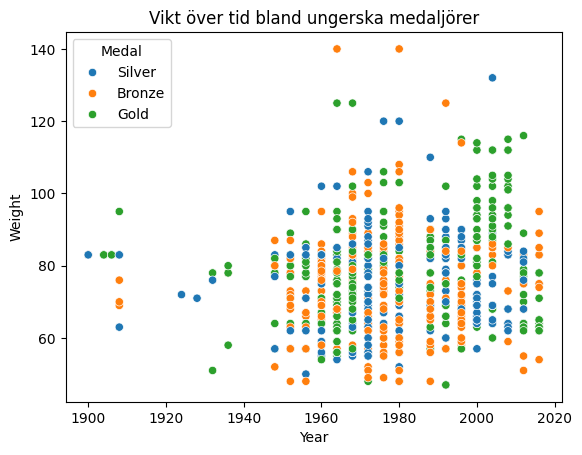

In [23]:
sns.scatterplot(x='Year', y='Weight', hue='Medal', data=medals)
plt.title("Vikt över tid bland ungerska medaljörer")
plt.show()


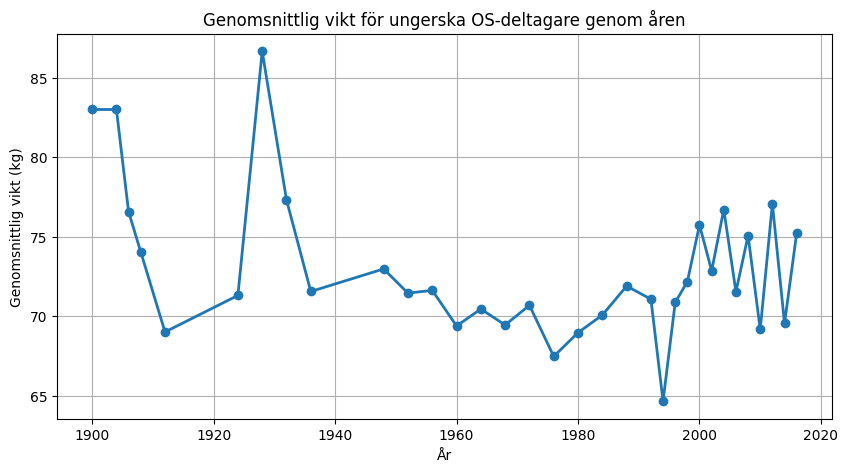

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Ladda in data
athletes = pd.read_csv("athlete_events.csv")
noc = pd.read_csv("noc_regions.csv")

# Slå ihop datasets
data = pd.merge(athletes, noc, on="NOC", how="left")

# Filtrera på Ungern
hungary = data[data["region"] == "Hungary"]

# Gruppera per år och ta medelvikt
weight_trend = hungary.groupby("Year")["Weight"].mean()

# Rensa bort år utan viktdata
weight_trend = weight_trend.dropna()

# Plotta viktkurva
plt.figure(figsize=(10,5))
plt.plot(weight_trend.index, weight_trend.values, marker='o', linestyle='-', linewidth=2)
plt.title("Genomsnittlig vikt för ungerska OS-deltagare genom åren")
plt.xlabel("År")
plt.ylabel("Genomsnittlig vikt (kg)")
plt.grid(True)
plt.show()


- ordförståelse:  
Dashboard  
render  
Deploya  
  
Skapa gemensamt repo -  (den som skapar repot är ägaren till det. Där det syns, alla andra clone repot lokalt och pushar. )  
  
Branches - skapa enklast via terminalen - för att skapa: git checkout -b new_branch, git push -u origin new_branch.   
Används när man jobbar lokalt på sin egen grej och sedan skickar det till main.   
  
Innan push till main. Granska.   
bra att pusha små grejer varje dag/varannan dag. så att det synkar med hela projektet.   

cicd push   
  
**git pull (alltid först för att undvika merge-konflikt, också alltid bra att starta dagens arbete med.), git merge och sedan git push** ( när man commitar direkt till main, inte använder brancher)  
  
Skapa repo - settings - collaborators - add people - deras gitanvändarnamn (de får ett mejl), om privat, alla som är inbjudna som ser.  
  
  

Uppgift 0 - tillsammans
VG - skriva ned vilka val man gör och vad som var intressant   

Uppgift 1 - Landstatistik  
Bättre att anonymisera en gång för mycket än en gång för lite  
  
När har de tagit medaljer - jämför med historiska händelser.  
  
Uppgift 2 - Sportstatistik  
Viktiga är att ta ett beslut om vad vi ska visualisera. Bara exempel i uppgiften.  
    
Uppgift 3 - Presentation (2 min per person ca)  
  Narrativ som stödjer en slutsats. presentera den här datan, för att det är relevant i sammanhanget.   

Uppgift 4 - video  
Använda teams - öppna eget möte och spela in.  
VG- inte bara redovisa för vad man själv gjort. Utan beskriva hela projektet.  
    

Källhänvisa om kodsnuttar tagits från andra källor - ChatGPT, Skiva vilken promt man använt för att få fram svaret. OM man bara tittat på annan kod och sedan skriver den själv - räknas inte som plagiat. behöver inte källhänvisas. 

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("heesoo37/120-years-of-olympic-history-athletes-and-results")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\fanny\.cache\kagglehub\datasets\heesoo37\120-years-of-olympic-history-athletes-and-results\versions\2


År på 80-talet 